In [1]:
import pandas as pd

# Load the dataset
titanic = pd.read_csv("train.csv")

# Display the first few rows of the dataset
print(titanic.head())

# Display information about the dataset
print(titanic.info())

# Display descriptive statistics of the dataset
print(titanic.describe())

# Check for missing values in the dataset
print(titanic.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

C:\Users\panka\AppData\Local\Temp\ipykernel_18180\3316548408.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Drop unnecessary columns
titanic_cleaned = titanic.drop(['PassengerId','Name','Ticket','Fare','Cabin'], axis=1)

# Display information about the cleaned dataset
print(titanic_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB
None


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


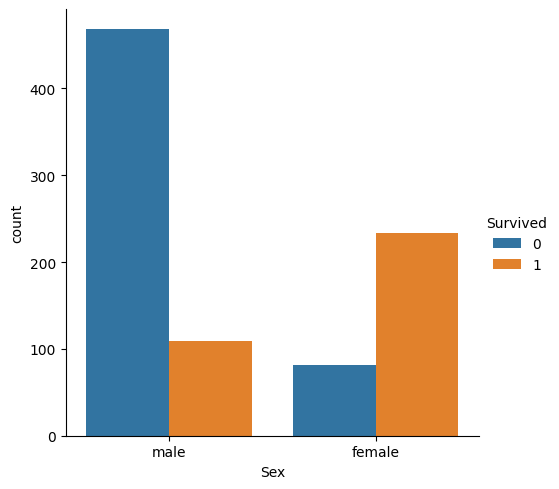

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

sns.catplot(x="Sex", hue="Survived", kind="count", data=titanic_cleaned)
print(titanic_cleaned.groupby(['Sex','Survived'])['Survived'].count())


<Axes: xlabel='Survived', ylabel='Sex'>

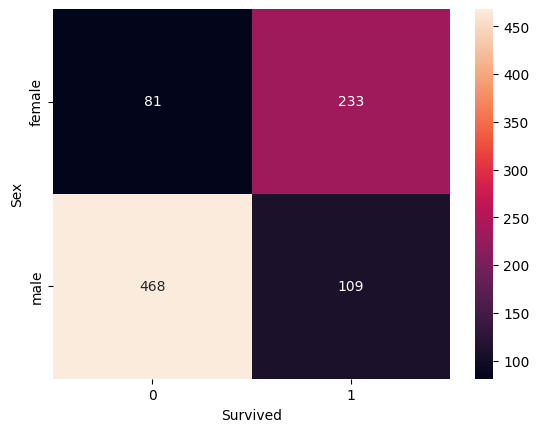

In [4]:
group1 = titanic_cleaned.groupby(['Sex','Survived'])
sns.heatmap(group1.size().unstack(), annot=True, fmt="d")


<Axes: xlabel='Sex', ylabel='Age'>

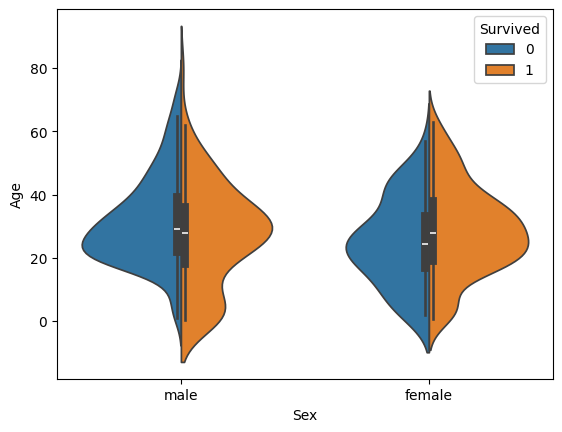

In [5]:
sns.violinplot(x="Sex", y="Age", hue="Survived", data=titanic_cleaned, split=True)


In [6]:
print("Oldest Person on Board:", titanic_cleaned['Age'].max())
print("Youngest Person on Board:", titanic_cleaned['Age'].min())
print("Average age of Person on Board:", titanic_cleaned['Age'].mean())


Oldest Person on Board: 80.0
Youngest Person on Board: 0.42
Average age of Person on Board: 29.69911764705882


In [7]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

titanic_cleaned['Age'] = titanic_cleaned[['Age','Pclass']].apply(impute_age, axis=1)
print(titanic_cleaned.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64


C:\Users\panka\AppData\Local\Temp\ipykernel_18180\59868156.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\panka\AppData\Local\Temp\ipykernel_18180\59868156.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [8]:
import numpy as np 
from sklearn.datasets import make_regression

x, y, coef = make_regression(n_samples=100, n_features=1, n_informative=1, noise=10, coef=True, random_state=0) 
x = np.interp(x, (x.min(), x.max()), (0, 20)) 
print(len(x)) 
print(x)
y = np.interp(y, (y.min(), y.max()), (20000, 150000)) 
print(len(y)) 
print(y)


100
[[ 9.09621765]
 [14.63742853]
 [12.25580785]
 [ 7.21515957]
 [ 6.90562848]
 [12.42799856]
 [ 6.53450315]
 [12.36358975]
 [11.45101022]
 [ 9.29527704]
 [ 8.46897323]
 [11.11359701]
 [ 4.21646281]
 [ 8.92109838]
 [13.29785748]
 [15.47570863]
 [ 9.84113925]
 [17.99332461]
 [16.61818648]
 [ 7.74737185]
 [14.6461329 ]
 [18.44957388]
 [ 8.7705892 ]
 [11.88558736]
 [13.74332637]
 [13.81155569]
 [18.67718793]
 [11.97104337]
 [ 9.14449312]
 [16.94375093]
 [ 6.87377602]
 [ 8.18679147]
 [ 6.2389242 ]
 [12.15553663]
 [10.63083424]
 [12.50645606]
 [11.18464153]
 [ 8.9153091 ]
 [10.80270889]
 [ 5.39192765]
 [14.96011903]
 [12.24674897]
 [ 3.51136012]
 [19.8803112 ]
 [11.3230796 ]
 [ 9.73649581]
 [15.68932604]
 [ 7.0453415 ]
 [17.90284439]
 [12.29004918]
 [ 6.82470934]
 [ 4.69845289]
 [12.51840023]
 [14.32303265]
 [15.31240374]
 [12.25434694]
 [12.19178147]
 [ 3.42836832]
 [16.68074531]
 [ 9.811036  ]
 [ 6.97608048]
 [11.84164639]
 [15.57357937]
 [ 2.37289516]
 [ 0.        ]
 [ 4.55601227]
 [10.4

          Survived    Pclass       Sex       Age     SibSp     Parch  Embarked
Survived  1.000000 -0.338481  0.543351 -0.046746 -0.035322  0.081629  0.108669
Pclass   -0.338481  1.000000 -0.131900 -0.411805  0.083081  0.018443  0.043835
Sex       0.543351 -0.131900  1.000000 -0.078573  0.114631  0.245489  0.118593
Age      -0.046746 -0.411805 -0.078573  1.000000 -0.243877 -0.171917 -0.045242
SibSp    -0.035322  0.083081  0.114631 -0.243877  1.000000  0.414838 -0.060606
Parch     0.081629  0.018443  0.245489 -0.171917  0.414838  1.000000 -0.079320
Embarked  0.108669  0.043835  0.118593 -0.045242 -0.060606 -0.079320  1.000000


<Axes: >

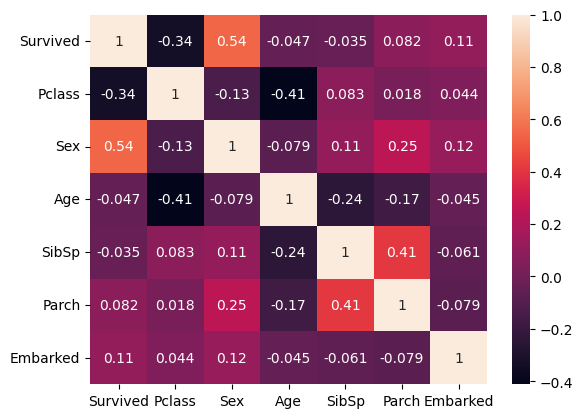

In [9]:
# Convert 'Sex' column to numeric values
titanic_cleaned['Sex'] = titanic_cleaned['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' column to numeric values
titanic_cleaned['Embarked'] = titanic_cleaned['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Calculate correlation and display
print(titanic_cleaned.corr(method='pearson'))
sns.heatmap(titanic_cleaned.corr(method='pearson'), annot=True, vmax=1)
